## CAR PRICE PREDICTION

## IMPORT LIBRARY

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.cm import get_cmap
import matplotlib.ticker as ticker
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway, pointbiserialr
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

import re
import pickle
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.3f}'.format)

## LOAD DATASET

In [2]:
# load dataset
df = pd.read_csv('File CSV/Car_Price_Prediction.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,smart,ForTwo Pure,2008,"61,595 mi.",Gasoline,70.0HP 1.0L 3 Cylinder Engine Gasoline Fuel,5-Speed A/T,Blue,Gray,None reported,Yes,"$5,000"
1,Volvo,XC90 Hybrid T8 R-Design,2018,"40,000 mi.",Plug-In Hybrid,400.0HP 2.0L 4 Cylinder Engine Plug-In Electri...,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$42,000"
2,Volvo,XC90 3.2,2011,"88,300 mi.",Gasoline,235.0HP 3.2L Straight 6 Cylinder Engine Gasoli...,A/T,Blue,Beige,At least 1 accident or damage reported,Yes,"$11,500"
3,Volvo,S90 T5 Momentum,2018,"95,000 mi.",Gasoline,250.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Beige,None reported,Yes,"$18,000"
4,Volvo,XC90 T6 Momentum,2018,"110,380 mi.",Gasoline,316.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Beige,At least 1 accident or damage reported,Yes,"$22,000"


In [3]:
# input data for input value in total_cylinder column
total_cylinder = pd.read_excel('File CSV/Total_Cylinder.xlsx')

# input data for input value in horse_power column
horse_power = pd.read_excel('File CSV/Horse_Power.xlsx')

# input data for input value in engine_capacity column
engine_capacity = pd.read_csv('File CSV/Engine_Capacity.csv')

# input data for input value in fuel_type column
fuel_type = pd.read_csv('File CSV/Fuel_Type.csv')

In [4]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


## DATA PREPROCESSING

In [5]:
# The replace() method with regex=True replaces all blank spaces (\s*) with NaN values in the entire DataFrame
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [6]:
# check missing values
pd.isnull(df).sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [7]:
# remove clean_title column and remove missing values
df.drop(columns=['clean_title', 'model_year'], inplace=True)
df.dropna(inplace=True)

In [8]:
# check duplicates
df.duplicated().sum()

0

## FEATURE EXTRACTION

## BRAND FEATURE

In [9]:
# change the smart value to Smart in the model column
df['brand'] = df['brand'].replace({'smart': 'Smart'})

In [10]:
# categorize brand names based on their product category
categories = {
    'Smart': 'Compact',
    'Volvo': 'Luxury',
    'Volkswagen': 'Compact',
    'Toyota': 'Sedan',
    'Suzuki': 'Compact',
    'Subaru': 'SUV',
    'Scion': 'Compact',
    'Saturn': 'Compact',
    'Saab': 'Luxury',
    'Rolls-Royce': 'Luxury',
    'RAM': 'Pick Up',
    'Porsche': 'Luxury',
    'Pontiac': 'Compact',
    'Plymouth': 'Compact',
    'Nissan': 'Sedan',
    'Mitsubishi': 'SUV',
    'Mercury': 'Compact',
    'Mercedes-Benz': 'Luxury',
    'McLaren': 'Sports',
    'Mazda': 'Compact',
    'Maybach': 'Luxury',
    'Maserati': 'Luxury',
    'MINI': 'Compact',
    'Lotus': 'Sports',
    'Lincoln': 'Luxury',
    'Lexus': 'Luxury',
    'Land': 'SUV',
    'Lamborghini': 'Sports',
    'Kia': 'Sedan',
    'Jeep': 'SUV',
    'Jaguar': 'Luxury',
    'INFINITI': 'Luxury',
    'Hyundai': 'Sedan',
    'Hummer': 'SUV',
    'Honda': 'Sedan',
    'Genesis': 'Luxury',
    'GMC': 'Pick Up',
    'Ford': 'Sedan',
    'Ferrari': 'Sports',
    'FIAT': 'Compact',
    'Dodge': 'Sedan',
    'Chrysler': 'Sedan',
    'Chevrolet': 'Sedan',
    'Cadillac': 'Luxury',
    'Buick': 'Luxury',
    'Bugatti': 'Sports',
    'Bentley': 'Luxury',
    'BMW': 'Luxury',
    'Audi': 'Luxury',
    'Aston': 'Luxury',
    'Alfa': 'Luxury',
    'Acura': 'Luxury'
}

df['product_category'] = df['brand'].map(categories)

## MILAGE FEATURE

In [11]:
# removing "mi." and converting to float
df['milage'] = df['milage'].str.replace(' mi.', '').str.replace(',', '').astype(int)

## FUEL TYPE FEATURE

In [12]:
# check the value strip (-) in the fuel_type column
df[df['fuel_type']=='–'].head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,product_category
22,Volvo,850 Turbo,94000,–,–,A/T,White,Black,None reported,"$4,500",Luxury
111,Toyota,Land Cruiser Base,231500,–,–,A/T,White,Gray,None reported,"$29,500",Sedan
163,Toyota,Land Cruiser Base,233000,–,–,A/T,Blue,Gray,None reported,"$7,500",Sedan
295,Toyota,Land Cruiser Base,178416,–,–,A/T,Green,Beige,None reported,"$9,000",Sedan
469,Rolls-Royce,Phantom,1560,–,–,–,Tempest,Cobalt Blue,None reported,"$599,995",Luxury


In [13]:
# replace the '-' value in fuel type and fill the value based on the fuel type table
rows_to_replace = df['fuel_type'] == '–'
fuel_type_mapping = fuel_type.set_index('Model')['Fuel Type'].to_dict()
df.loc[rows_to_replace, 'fuel_type'] = df.loc[rows_to_replace, 'model'].map(fuel_type_mapping)

In [14]:
# change not supported value to hydrogen
fuel_type_updates = [
    (239, 'Hydrogen'),
    (279, 'Hydrogen')
]

for index, value in fuel_type_updates:
    df.loc[index, 'fuel_type'] = value

## ENGINE FEATURE

### EXTRACT TO HORSE POWER (HP)

In [15]:
# check the value strip (-) in the engine column
df[df['engine']=='–'].head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,product_category
22,Volvo,850 Turbo,94000,Gasoline,–,A/T,White,Black,None reported,"$4,500",Luxury
111,Toyota,Land Cruiser Base,231500,Gasoline,–,A/T,White,Gray,None reported,"$29,500",Sedan
163,Toyota,Land Cruiser Base,233000,Gasoline,–,A/T,Blue,Gray,None reported,"$7,500",Sedan
295,Toyota,Land Cruiser Base,178416,Gasoline,–,A/T,Green,Beige,None reported,"$9,000",Sedan
469,Rolls-Royce,Phantom,1560,Gasoline,–,–,Tempest,Cobalt Blue,None reported,"$599,995",Luxury


In [16]:
# extract horse power (HP) from engine column and cleaning process data
df['horse_power'] = df['engine'].str.extract('(\d+\.\d+)HP', expand=False)
df['horse_power'] = df['horse_power'].str.replace('.0', '').str.replace(',', '')

In [17]:
# replace the NaN value in horse power and fill the value based on the horse power table
horse_power_mapping = horse_power.set_index('Model')['Horsepower'].to_dict()
df['horse_power'] = df['horse_power'].fillna(df['model'].map(horse_power_mapping))

In [18]:
# change the data type to integer
df['horse_power'] = df['horse_power'].astype('int64')

### EXTRACT TO ENGINE CAPACITY (LITER)

In [19]:
# extracts the total engine capacity from the engine column
df['engine_capacity'] = df['engine'].str.extract(r'(\d+\.\d+L|\d+ Liter)', expand=False)
df['engine_capacity'].replace({'L': '', 'Liter': '', 'iter': ''}, regex=True, inplace=True)
df['engine_capacity'] = df['engine_capacity'].astype(float).round(1)

In [20]:
# there are some values that are not successfully extracted, so we input them manually based on the index
values_to_update = {
    232: 4, 240: 4, 408: 2, 412: 2, 722: 4, 966: 3, 1023: 2, 1336: 3, 1637: 5, 1662: 5, 1762: 4, 3327: 4, 3334: 4, 1784: 2, 1915: 2, 2672: 6.7, 3335: 6, 3434: 3, 3491: 2, 3823: 3, 
    3934: 2, 43: 2, 53: 2, 92: 2, 100: 2, 107: 5.7, 200: 3.5, 224: 3.5, 251: 3.5, 255: 3.5, 263: 3.5, 599: 3, 601: 3, 609: 2, 612: 3, 621: 3, 652: 3, 687: 2, 689: 2.9, 690: 3, 736: 4,
    800: 1.8, 808: 5.6, 828: 5.6, 876: 3.5, 947: 2, 949: 3, 951: 4.7, 967: 4, 974: 3, 983: 2, 1011: 3, 1025: 4, 1031: 4, 1033: 5.5, 1035: 4, 1052: 3, 1093: 2, 1095: 2, 1099: 2, 1101: 3,
    1102: 3, 1135: 3, 1163: 2, 1180: 2, 1197: 2, 1211: 2, 1228: 2, 1235: 2, 1242: 2, 1266: 2.5, 1283: 1.3, 1300: 1.3, 1317: 1.3, 1399: 3, 1450: 3.5, 1459: 2.4, 1477: 4.6, 1492: 3.5,
    1495: 3.5, 1499: 3.5, 1511: 4.6, 1553: 3.5, 1562: 3.5, 1568: 3.5, 1581: 2.5, 1589: 2.5, 1615: 2, 1621: 3, 1622: 2, 1623: 3, 1625: 4.4, 1628: 2, 1629: 3, 1631: 2, 1634: 2, 1639: 2,
    1641: 2, 1647: 4.4, 1648: 5, 1652: 3, 1657: 3, 1854: 6.4, 1873: 3.6, 1874: 3.6, 1910: 3.6, 1990: 2, 1997: 3, 1999: 3, 2004: 2, 2008: 3, 2009: 2, 2032: 2, 2184: 3.5, 2206: 3.5,
    2370: 5.4, 2374: 3.5, 2396: 5.4, 2801: 6.4, 2857: 3.6, 2929: 5.3, 2963: 6.2, 3139: 2.7, 3183: 3.6, 3217: 3.6, 3328: 6, 3343: 3, 3346: 3, 3348: 4.4, 3350: 3, 3357: 2, 3359: 4.4, 3361: 3,
    3367: 4.4, 3372: 2, 3375: 3, 3379: 2, 3385: 3, 3390: 4.4, 3408: 2, 3409: 4.4, 3412: 4.4, 3418: 3, 3421: 4.4, 3422: 3, 3424: 4.4, 3427: 4.4, 3468: 4.4, 3470: 6.6, 3572: 2, 3585: 4.4,
    3586: 2, 3589: 3, 3596: 3, 3612: 3, 3615: 3, 3728: 3, 3738: 2, 3742: 2, 3757: 4, 3764: 4, 3776: 2, 3804: 3, 3815: 3, 3816: 3, 3822: 3, 3832: 2, 3845: 2, 3847: 2, 3849: 2, 3856: 2,
    3864: 2, 3876: 2, 3880: 2, 3908: 2, 3945: 2.4, 3947: 1.5, 3949: 2, 3953: 3.5, 3975: 2, 3976: 2, 3978: 2, 3981: 2, 3987: 3.5, 3990: 2, 4000: 3.5, 4002: 3.5
}

df['engine_capacity'].update(pd.Series(values_to_update))

In [21]:
# replace the NaN value in engine capacity and fill the value based on the engine capacity table
engine_capacity_mapping = engine_capacity.set_index('Model')['Total Engine Capacity (Liters)'].to_dict()
df['engine_capacity'] = df['engine_capacity'].fillna(df['model'].map(engine_capacity_mapping))

### EXTRACT TO TOTAL CYLINDER

In [22]:
# extracts cylinder totals from the engine column
df['total_cylinder'] = df['engine'].str.extract(r'L\s*([^,]+)', expand=False)

In [23]:
# there are some values that are not successfully extracted, so we input them manually based on the index
engine_type_updates = [
    (239, 'Electric Motor Hydrogen Fuel'),
    (279, 'Electric Motor Hydrogen Fuel'),
    (3328, '12 Cylinder Engine'),
    (2672, 'Intercooled Turbo Diesel V-8'),
    (3491, 'Intercooled Turbo Premium Unleaded I-4')
]

for index, value in engine_type_updates:
    df.loc[index, 'total_cylinder'] = value

In [24]:
# there are some values that are not successfully extracted, so we input them manually based on the index
def extract_cylinder_type(engine_type):
    if pd.isna(engine_type):
        return None
    
    match = re.search(r'(\d+)\s*Cylinder', engine_type)
    
    if match:
        return int(match.group(1))
    
    if 'I3' in engine_type:
        return 3
    elif 'I4' in engine_type or 'I-4' in engine_type:
        return 4
    elif 'I6' in engine_type or 'I-6' in engine_type:
        return 6
    elif 'V-6' in engine_type or 'V6' in engine_type:
        return 6
    elif 'H-4' in engine_type or 'H4' in engine_type:
        return 4
    elif 'H6' in engine_type or 'H-6' in engine_type:
        return 6
    elif 'V-8' in engine_type or 'V8' in engine_type:
        return 8
    elif 'V10' in engine_type or 'V-10' in engine_type:
        return 10
    elif 'V12' in engine_type or 'V-12' in engine_type:
        return 12
    elif 'W12' in engine_type or 'W-12' in engine_type:
        return 12
    elif 'W16' in engine_type:
        return 16
    else:
        return pd.NA
    
    return engine_type

df['total_cylinder'] = df['total_cylinder'].astype(str)
df['total_cylinder'] = df['total_cylinder'].apply(extract_cylinder_type)

In [25]:
# replace the NaN value in total cylinder and fill the value based on the total cylinder table
df['total_cylinder'] = df['total_cylinder'].fillna(df['model'].map(total_cylinder.set_index('Model Mobil')['Jumlah Silinder']))

## TRANSMISSION

In [26]:
# categorize transmissions into several common transmission types for brevity
df['transmission_group'] = 'Other'

df.loc[df['transmission'].str.contains('Automatic|A/T|Auto|Transmission', case=False), 'transmission_group'] = 'Automatic'
df.loc[df['transmission'].str.contains('Manual|M/T|6-Speed|7-Speed|2', case=False), 'transmission_group'] = 'Manual'
df.loc[df['transmission'].str.contains('Dual-Clutch', case=False), 'transmission_group'] = 'Dual-Clutch'
df.loc[df['transmission'].str.contains('CVT|Variable', case=False), 'transmission_group'] = 'CVT'

df['transmission'] = df['transmission_group']
df.drop('transmission_group', axis=1, inplace=True)

In [27]:
# Fill in the missing values by manual input based on the index
values_to_update = {
    200: 'Automatic',
    251: 'Automatic',
    469: 'Automatic',
    599: 'Dual-Clutch',
    612: 'Dual-Clutch',
    1459: 'Automatic',
    2421: 'Automatic',
    3612: 'Automatic',
    3945: 'CVT',
    3953: 'Automatic'
}

df['transmission'].update(pd.Series(values_to_update))

## PRICE

In [28]:
# remove dollar signs and commas, and convert them to integers
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(int)

## ADDITIONAL CLEANING PROCESS

In [29]:
# change the data type to integer in the milage and price columns
df['milage'] = df['milage'].astype('int64')
df['price'] = df['price'].astype('int64')

In [30]:
# delete some columns that are not needed
df.drop(columns=['engine', 'model', 'ext_col', 'int_col'], inplace=True)

In [31]:
# sort the columns in the dataframe to make it more structured
col_order = ['product_category', 'brand', 'milage', 'horse_power', 'engine_capacity', 'total_cylinder', 'fuel_type', 'transmission', 'accident', 'price']
df = df[col_order]

In [32]:
# check unique values from column categorical data types
for column in df.columns:
    if df[column].dtype=='object':
        unique_values=df[column].value_counts()
        print(f'{column}: {unique_values}')
        print('-'*90)

product_category: product_category
Luxury     1699
Sedan      1256
SUV         363
Compact     186
Pick Up     178
Sports       48
Name: count, dtype: int64
------------------------------------------------------------------------------------------
brand: brand
BMW              362
Ford             360
Mercedes-Benz    307
Chevrolet        280
Toyota           195
Audi             188
Porsche          177
Lexus            161
Jeep             138
Land             126
Nissan           109
Cadillac         103
RAM               90
Dodge             89
GMC               88
Kia               71
Hyundai           65
Acura             63
Subaru            63
Mazda             62
Honda             60
Volkswagen        56
INFINITI          56
Lincoln           50
Jaguar            46
Volvo             36
Maserati          33
MINI              32
Bentley           31
Buick             30
Chrysler          27
Lamborghini       26
Mitsubishi        20
Genesis           19
Hummer            16
Alfa

In [33]:
# check unique values from column numerical data types
for column in df.columns:
    if df[column].dtype!='object':
        unique_values=df[column].value_counts()
        print(f'{column}: {unique_values}')
        print('-'*90)

milage: milage
110000    16
45000     15
92000     12
54000     12
40000     12
          ..
121000     1
107818     1
14206      1
40906      1
151600     1
Name: count, Length: 2640, dtype: int64
------------------------------------------------------------------------------------------
horse_power: horse_power
300    118
420     86
400     84
355     75
310     73
      ... 
660      1
126      1
483      1
788      1
70       1
Name: count, Length: 361, dtype: int64
------------------------------------------------------------------------------------------
engine_capacity: engine_capacity
2.000    527
3.000    464
3.500    345
3.600    237
4.000    192
6.200    171
2.500    169
5.700    130
5.000    112
5.300    103
3.800    102
2.400    102
4.400     92
4.600     71
6.000     66
3.700     62
1.600     59
4.700     55
6.700     52
1.800     48
2.700     47
1.500     38
2.300     37
5.600     36
6.400     33
3.200     32
5.200     29
5.500     28
3.400     28
4.800     27
4.200     25

In [34]:
# displays the top 5 rows of data
df.head()

,product_category,brand,milage,horse_power,engine_capacity,total_cylinder,fuel_type,transmission,accident,price
0,Compact,Smart,61595,70,1.000,3.000,Gasoline,Automatic,None reported,5000
1,Luxury,Volvo,40000,400,2.000,4.000,Plug-In Hybrid,Automatic,None reported,42000
2,Luxury,Volvo,88300,235,3.200,6.000,Gasoline,Automatic,At least 1 accident or damage reported,11500
3,Luxury,Volvo,95000,250,2.000,4.000,Gasoline,Automatic,None reported,18000
4,Luxury,Volvo,110380,316,2.000,4.000,Gasoline,Automatic,At least 1 accident or damage reported,22000


In [35]:
# dataset information after cleaning process
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3730 entries, 0 to 4008
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_category  3730 non-null   object 
 1   brand             3730 non-null   object 
 2   milage            3730 non-null   int64  
 3   horse_power       3730 non-null   int64  
 4   engine_capacity   3730 non-null   float64
 5   total_cylinder    3730 non-null   float64
 6   fuel_type         3730 non-null   object 
 7   transmission      3730 non-null   object 
 8   accident          3730 non-null   object 
 9   price             3730 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 449.6+ KB


## DESCRIPTIVE STATISTICS

In [36]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
milage,3730.000,66901.512,52677.340,100.000,24795.250,55167.000,96475.250,405000.000
horse_power,3730.000,328.661,117.593,1.000,248.000,310.000,400.000,797.000
engine_capacity,3730.000,3.686,1.417,1.000,2.500,3.500,4.700,8.400
total_cylinder,3730.000,6.172,1.748,2.000,4.000,6.000,8.000,16.000
price,3730.000,43980.915,81022.328,2000.000,16777.500,30000.000,48500.000,2954083.000


## EXPLORATORY DATA ANALYSIS

In [37]:
# categorize data according to its data type
numerical_features = []
categorical_features = []
target_feature = 'price'

for column in df.columns:
    if column not in [target_feature]:
        if df[column].dtype in ['int64', 'float64']:
            numerical_features.append(column)
        else:
            categorical_features.append(column)

print('Numerical Features:', numerical_features)
print('Categorical Features:', categorical_features)
print('Target Feature:', target_feature)

Numerical Features: ['milage', 'horse_power', 'engine_capacity', 'total_cylinder']
Categorical Features: ['product_category', 'brand', 'fuel_type', 'transmission', 'accident']
Target Feature: price


In [62]:
import plotly.express as px

fig = px.box(df, x='accident', y='price',
             title='Box Plot Mileage by Accident')

# Menetapkan lebar dan tinggi gambar
fig.update_layout(width=600, height=500)

# Menetapkan judul
fig.update_layout(title_text='Accident by Price')

# Menghilangkan keterangan pada sumbu x dan y
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='')

# Menampilkan plot
fig.show()

## UNIVARIATE ANALYSIS

### CATEGORICAL VARIABLE

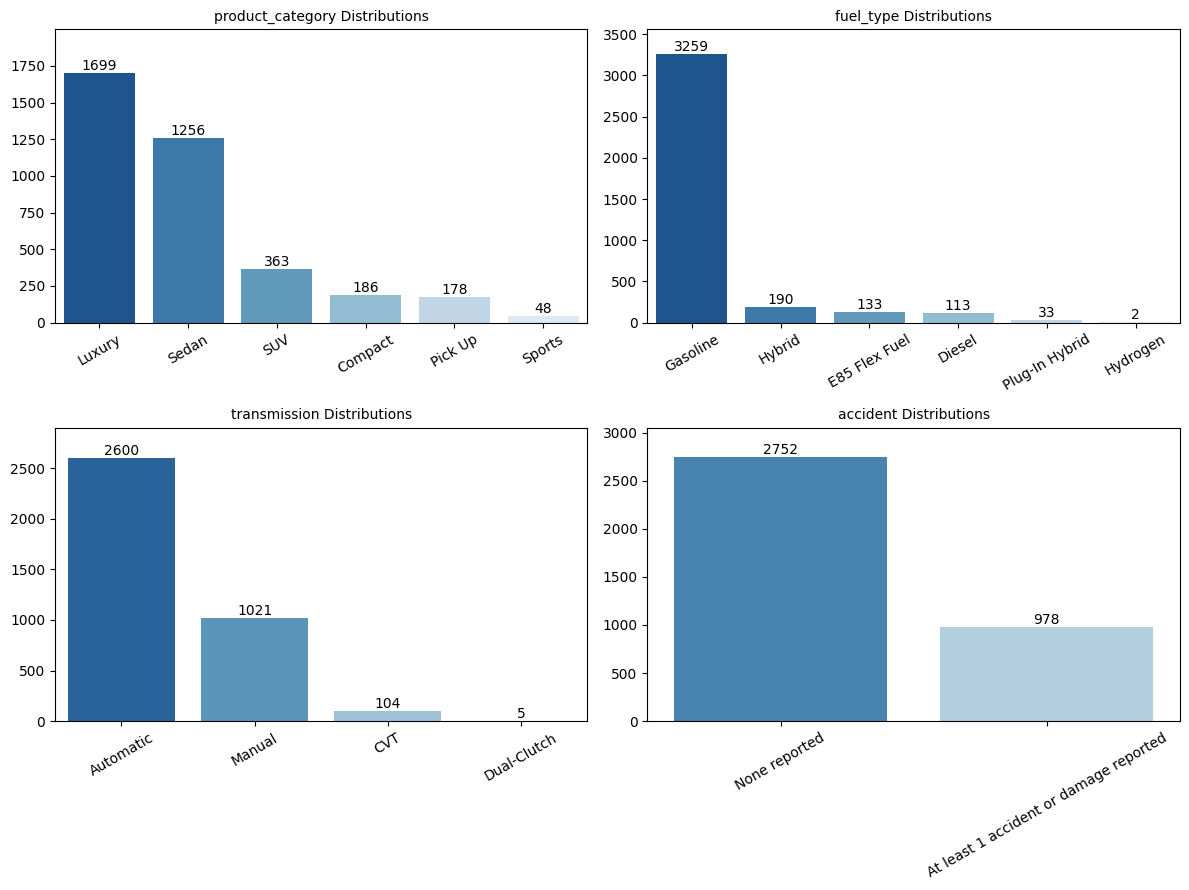

In [38]:
# countplot visualization for each value in categorical data
selected_features = [feature for feature in categorical_features if feature != 'brand']
num_rows = 2
num_cols = 2

plt.figure(figsize=(12, 9))

for i in range(len(selected_features)):
    plt.subplot(num_rows, num_cols, i + 1)

    counts = df[selected_features[i]].value_counts()

    ax = sns.barplot(x=counts.index, y=counts, palette='Blues_r')

    for j, count in enumerate(counts):
        ax.text(j, count, count, ha='center', va='bottom', fontsize=10)

    plt.title(selected_features[i] + ' Distributions', fontsize=10)
    plt.xticks(rotation=30)
    plt.xlabel('')
    plt.ylabel('')

    plt.ylim(0, counts.max() + 300)
    plt.tight_layout()

plt.show()

### NUMERICAL VARIABLE

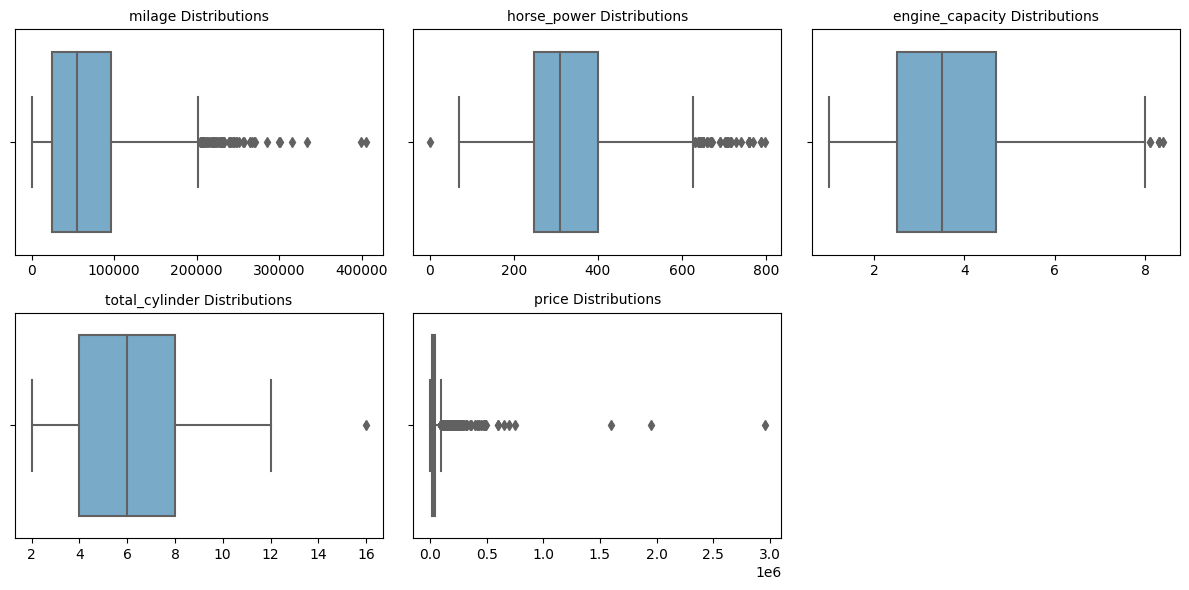

In [39]:
# Plot numeric variable distribution using Box-Plot
numeric_features = numerical_features + [target_feature]

num_plots = len(numeric_features)
num_cols = 3
num_rows = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i in range(num_plots):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.boxplot(data=df, x=numeric_features[i], palette='Blues_r', ax=ax)
    ax.set_title(numeric_features[i] + ' Distributions', fontsize=10)
    ax.set_xlabel('')

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

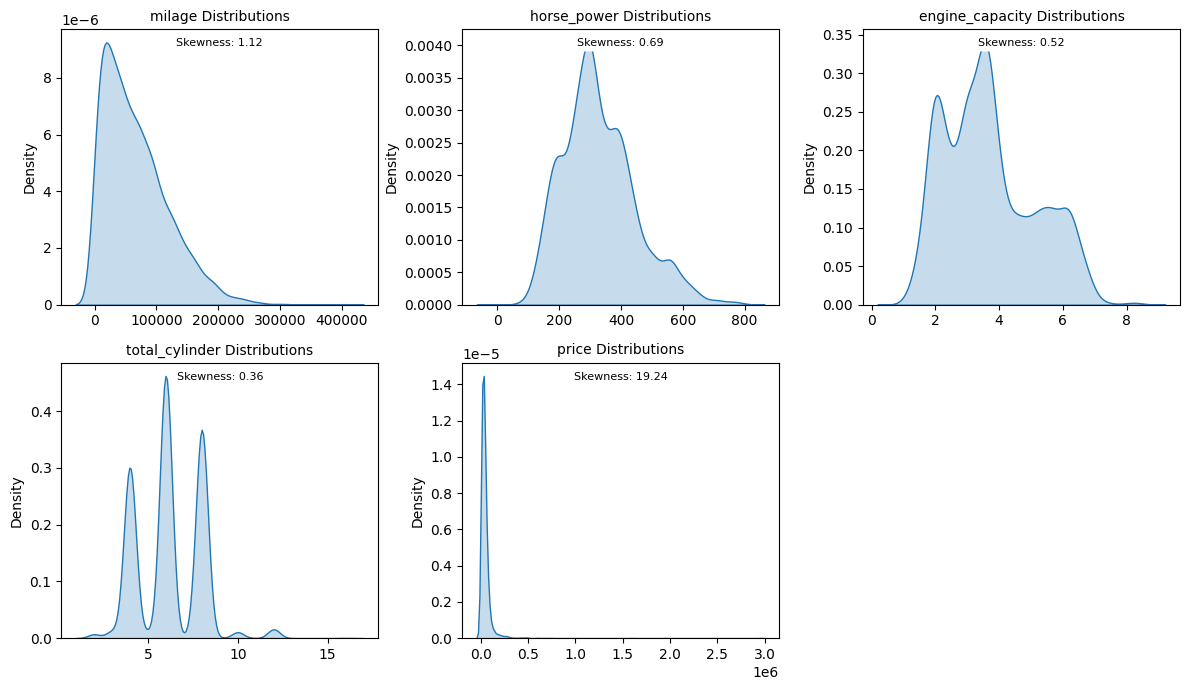

In [40]:
# Plot numeric variable distribution using KDE Plot
numeric_features = numerical_features + [target_feature]
num_plots = len(numeric_features)

num_cols = 3
num_rows = int(np.ceil(num_plots / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 7))

for i in range(num_plots):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.kdeplot(data=df, x=numeric_features[i], palette='Blues_r', fill=True, ax=ax)
    skew_value = df[numeric_features[i]].skew()

    ax.annotate(f"Skewness: {skew_value:.2f}", xy=(0.5, 0.95), xycoords='axes fraction', ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white'),
                fontsize=8)

    ax.set_xlabel('')
    ax.set_title(numeric_features[i] + ' Distributions', fontsize=10)

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

## BIVARIATE ANALYSIS

### CATEGORICAL AND TARGET VARIABLE

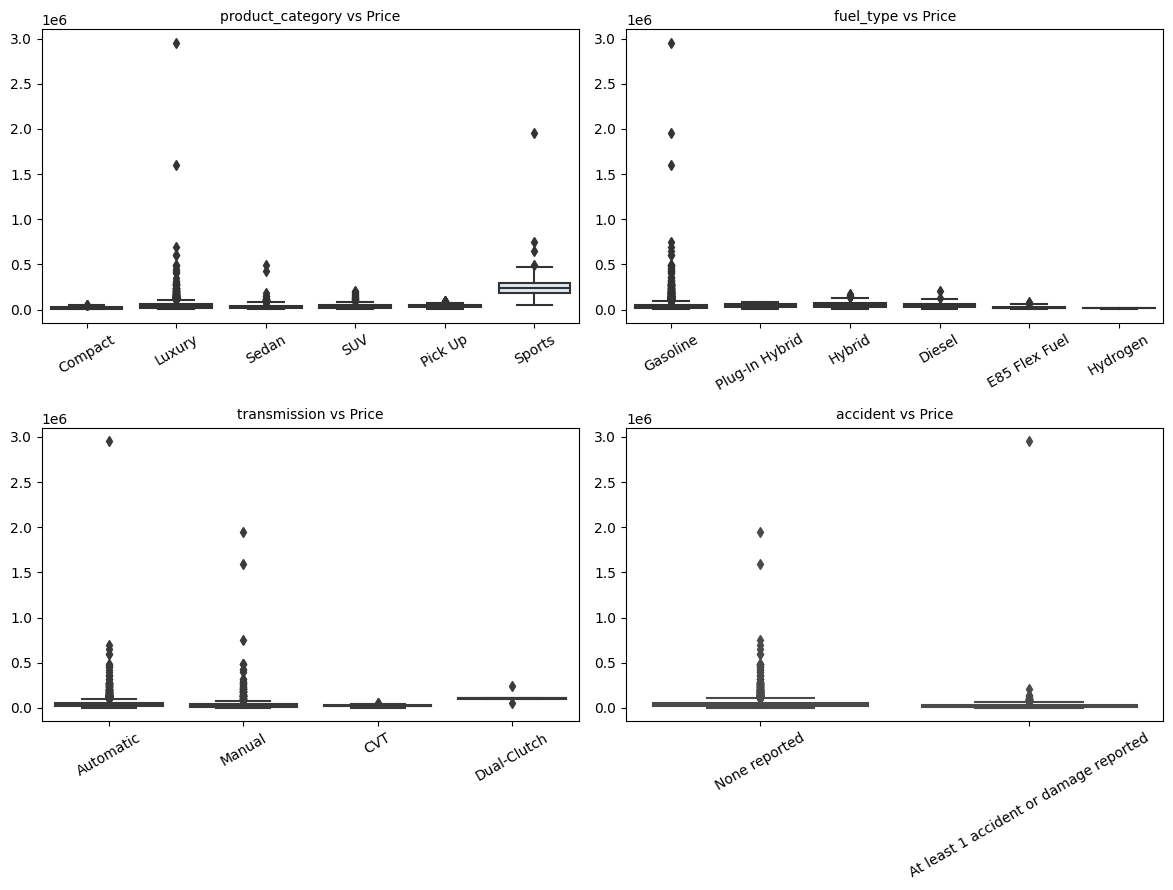

In [41]:
# data distribution analysis on categorical with target variable
selected_features = [feature for feature in categorical_features if feature != 'brand']
num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 9))

for i, feature in enumerate(selected_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    top_values = None
    if feature in ['brand']:
        top_values = df[feature].value_counts().nlargest(8).index
        sns.boxplot(x=feature, y=target_feature, data=df[df[feature].isin(top_values)], palette='Blues_r', ax=ax)
    else:
        sns.boxplot(x=feature, y=target_feature, data=df, palette='Blues_r', ax=ax)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(feature + ' vs Price', fontsize=10)
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

### NUMERICAL AND TARGET VARIABLE

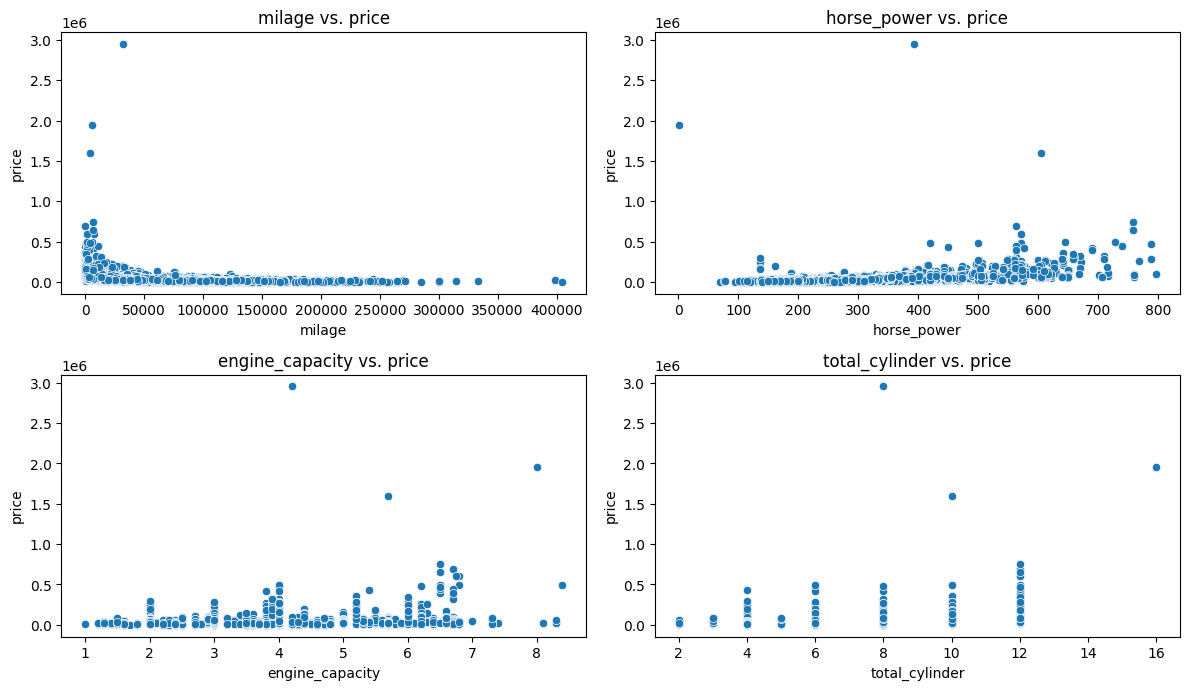

In [42]:
# data distribution analysis on numerical with target variable
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols

    sns.scatterplot(x=df[feature], y=df[target_feature], ax=axes[row, col])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel(target_feature)
    axes[row, col].set_title(f'{feature} vs. {target_feature}', fontsize=12)

if len(numerical_features) < num_rows * num_cols:
    for i in range(len(numerical_features), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

## MULTIVARIATE ANALYSIS

### BETWEEN CATEGORICAL VARIABLE USING CHI-SQUARED

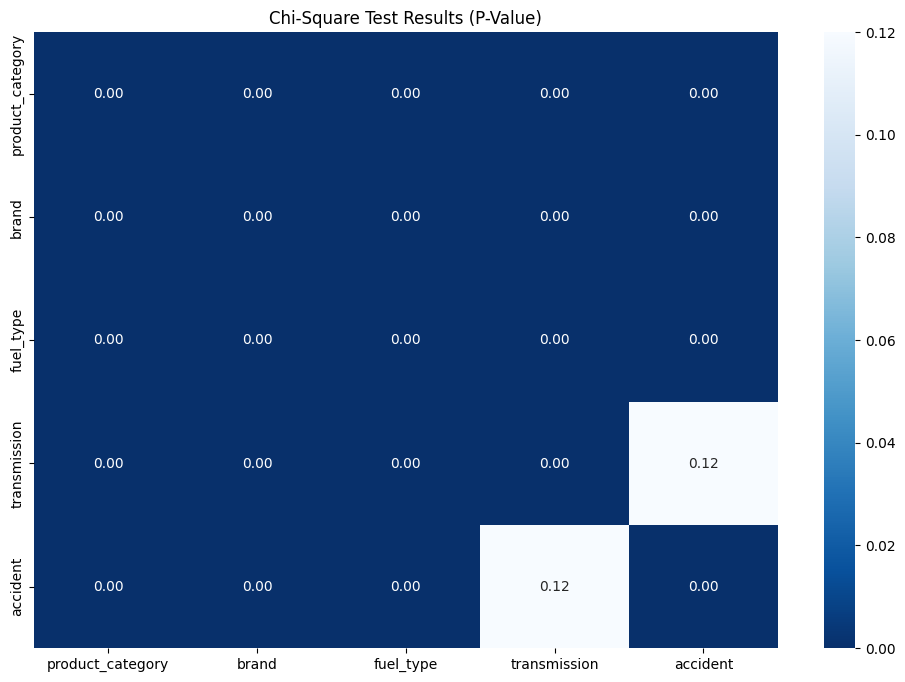

In [43]:
# correlation analysis on categorical with categorical using chi-squared test
result = pd.DataFrame(data=0.0, columns=categorical_features, index=categorical_features)

for i in categorical_features:
    for j in categorical_features:
        if i != j:
            contingency_table = pd.crosstab(df[i], df[j])
            chi2_val, p_val, _, _ = chi2_contingency(contingency_table)
            result.loc[i, j] = round(p_val, 2)

fig = plt.figure(figsize=(12, 8))
sns.heatmap(result, annot=True, cmap='Blues_r', fmt='.2f')
plt.title('Chi-Square Test Results (P-Value)')
plt.show() 

In [44]:
# looks at the relationship between two categorical variables
p_value_threshold = 0.05

significant_relationships = []
non_significant_relationships = []

for i in categorical_features:
    for j in categorical_features:
        if i != j:
            contingency_table = pd.crosstab(df[i], df[j])
            _, p_value, _, _ = chi2_contingency(contingency_table)
            
            if p_value < p_value_threshold:
                significant_relationships.append((i, j))
            else:
                non_significant_relationships.append((i, j))

if significant_relationships:
    print('A significant relationship was detected between the following pairs of categorical variables:')
    print()
    for i, j in significant_relationships:
        print(f"{i} and {j}")
else:
    print('There is no significant relationship between pairs of categorical variables')

if non_significant_relationships:
    print('\nNo significant relationship was detected between the following pairs of categorical variables:')
    print()
    for i, j in non_significant_relationships:
        print(f"{i} and {j}")
else:
    print('\nAll pairs of categorical variables have significant relationships.')

A significant relationship was detected between the following pairs of categorical variables:

product_category and brand
product_category and fuel_type
product_category and transmission
product_category and accident
brand and product_category
brand and fuel_type
brand and transmission
brand and accident
fuel_type and product_category
fuel_type and brand
fuel_type and transmission
fuel_type and accident
transmission and product_category
transmission and brand
transmission and fuel_type
accident and product_category
accident and brand
accident and fuel_type

No significant relationship was detected between the following pairs of categorical variables:

transmission and accident
accident and transmission


### BETWEEN NUMERICAL VARIABLE USING SPEARMAN CORRELATION

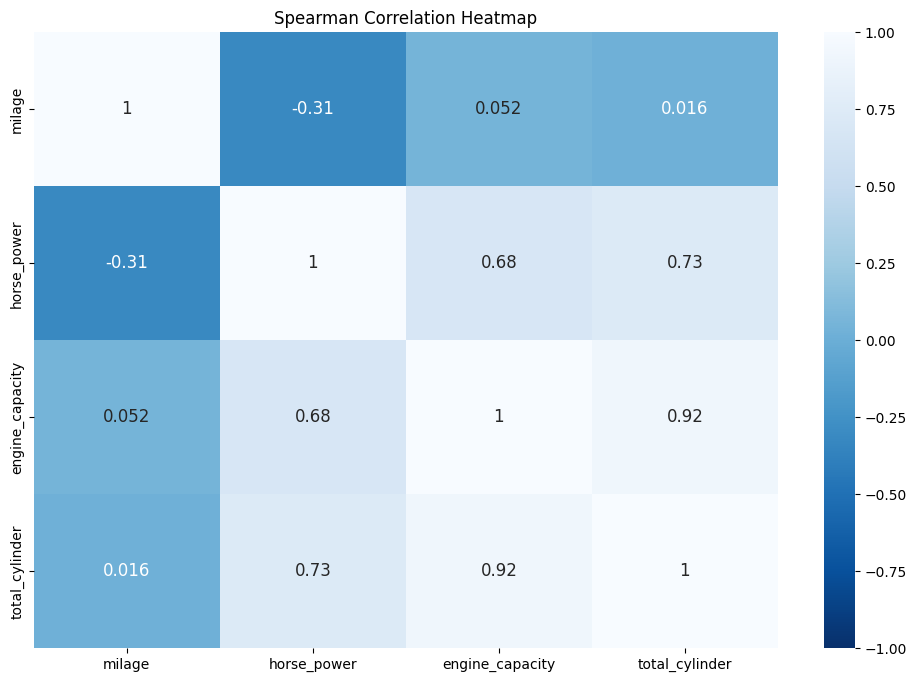

In [45]:
# correlation analysis on numerical with numerical using spearman
corr = df[numerical_features].corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='Blues_r', annot_kws={'size': 12})
plt.title('Spearman Correlation Heatmap')
plt.show()

In [46]:
# looks at the relationship between two numerical variables using VIF score
numeric = df[numerical_features]
numeric = sm.add_constant(numeric)

vif_numeric_pairwise = pd.DataFrame()
vif_numeric_pairwise['Variable'] = numeric.columns[1:]
vif_numeric_pairwise['VIF'] = [variance_inflation_factor(numeric.values, i) for i in range(1, numeric.shape[1])]

vif_threshold = 5

multicollinear_vars = []
for idx, row in vif_numeric_pairwise.iterrows():
    if row['VIF'] > vif_threshold:
        multicollinear_vars.append(row['Variable'])

print('Correlation between Numerical Variables:')
print(corr)
print('-'*90)

print('VIF between Numerical Variables (Pairwise):')
print(vif_numeric_pairwise)
print('-'*90)

if multicollinear_vars:
    print('Multicollinearity symptoms were detected in the following variables:')
    for var in multicollinear_vars:
        print(var)
else:
    print('No multicollinearity symptoms were detected')

Correlation between Numerical Variables:
                 milage  horse_power  engine_capacity  total_cylinder
milage            1.000       -0.313            0.052           0.016
horse_power      -0.313        1.000            0.677           0.734
engine_capacity   0.052        0.677            1.000           0.921
total_cylinder    0.016        0.734            0.921           1.000
------------------------------------------------------------------------------------------
VIF between Numerical Variables (Pairwise):
          Variable   VIF
0           milage 1.307
1      horse_power 2.571
2  engine_capacity 4.411
3   total_cylinder 5.372
------------------------------------------------------------------------------------------
Multicollinearity symptoms were detected in the following variables:
total_cylinder


### BETWEEN CATEGORICAL AND NUMERICAL VARIABLE USING ANOVA

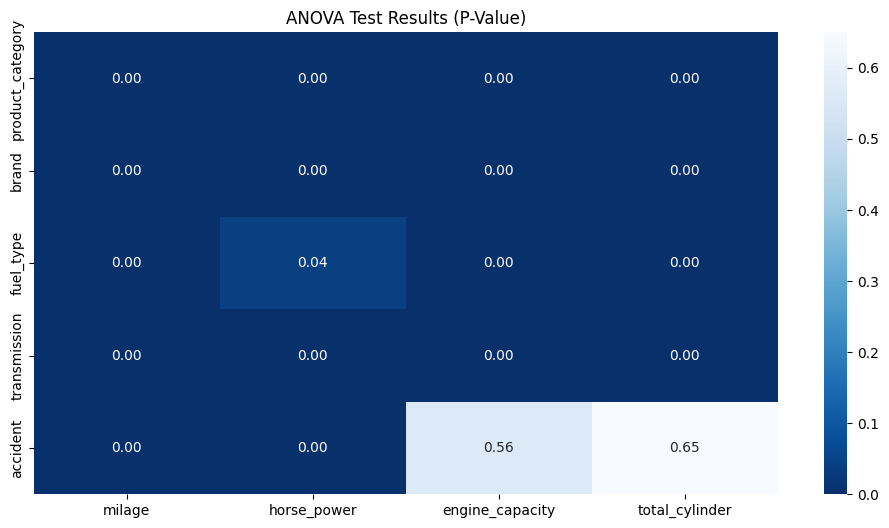

In [47]:
# correlation analysis between categorical and numerical variables using ANOVA
anova_results = {}

p_values_df = pd.DataFrame(index=categorical_features, columns=numerical_features, dtype=np.float64)

for num_feat in numerical_features:
    groups = []

    for cat_feat in categorical_features:
        group_data = [df[num_feat][df[cat_feat] == category] for category in df[cat_feat].unique()]
        F, p = f_oneway(*group_data)
        p_values_df.loc[cat_feat, num_feat] = round(p, 2)

p_values_df = p_values_df.applymap(lambda x: '{:.3f}'.format(x) if not pd.isna(x) else x)
plt.figure(figsize=(12, 6))
sns.heatmap(p_values_df.astype(float), cmap='Blues_r', annot=True, fmt='.2f')
plt.title('ANOVA Test Results (P-Value)')
plt.show()

In [48]:
# looks at the relationship between categorical and numerical variables
p_value_threshold = 0.05

significant_relationships = []
non_significant_relationships = []

for num_feat in numerical_features:
    for cat_feat in categorical_features:
        p_value = float(p_values_df.loc[cat_feat, num_feat])
        if p_value < p_value_threshold:
            significant_relationships.append((cat_feat, num_feat))
        else:
            non_significant_relationships.append((cat_feat, num_feat))

if significant_relationships:
    print('Significant differences were detected between the following categorical and numerical variables:')
    print()
    for cat_feat, num_feat in significant_relationships:
        print(f"{cat_feat} dan {num_feat}")
else:
    print('There is no significant difference between categorical and numerical variables.')

if non_significant_relationships:
    print('\nNo significant relationship was detected between the following categorical and numerical variables:')
    print()
    for i, j in non_significant_relationships:
        print(f"{i} and {j}")
else:
    print('\nAll pairs of categorical variables have significant relationships.')

Significant differences were detected between the following categorical and numerical variables:

product_category dan milage
brand dan milage
fuel_type dan milage
transmission dan milage
accident dan milage
product_category dan horse_power
brand dan horse_power
fuel_type dan horse_power
transmission dan horse_power
accident dan horse_power
product_category dan engine_capacity
brand dan engine_capacity
fuel_type dan engine_capacity
transmission dan engine_capacity
product_category dan total_cylinder
brand dan total_cylinder
fuel_type dan total_cylinder
transmission dan total_cylinder

No significant relationship was detected between the following categorical and numerical variables:

accident and engine_capacity
accident and total_cylinder


## FEATURE ENCODING

In [49]:
# to be able to use the ANOVA test, convert categorical data to numeric using variable encoding
df['product_category'] = df['product_category'].replace({'Pick Up': 0, 'Compact': 1, 'SUV': 2, 'Sedan': 3, 'Sports': 4, 'Luxury': 5})

label_encoder = LabelEncoder()
features_to_label_encode = ['brand']

for feature in features_to_label_encode:
    df[feature] = label_encoder.fit_transform(df[feature])

transmission_order = {
    'Manual': 0,
    'Automatic': 1,
    'CVT': 2,
    'Dual-Clutch': 3
}
df['transmission'] = df['transmission'].map(transmission_order)

df['accident'] = df['accident'].replace({'At least 1 accident or damage reported': 0, 'None reported': 1})

df = pd.get_dummies(df, columns=['fuel_type'])

In [50]:
# categorize data according to its data type again
numerical_features = []
categorical_features = []
target_feature = 'price'

for column in df.columns:
    if column != target_feature:
        if df[column].dtype in ['int64', 'float64'] and column not in ['product_category', 'accident', 'transmission']:
            numerical_features.append(column)
        else:
            categorical_features.append(column)

print('Numerical Features:', numerical_features)
print('Categorical Features:', categorical_features)
print('Target Feature:', target_feature)

Numerical Features: ['milage', 'horse_power', 'engine_capacity', 'total_cylinder']
Categorical Features: ['product_category', 'brand', 'transmission', 'accident', 'fuel_type_Diesel', 'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline', 'fuel_type_Hybrid', 'fuel_type_Hydrogen', 'fuel_type_Plug-In Hybrid']
Target Feature: price


### BETWEEN CATEGORICAL AND TARGET VARIABLE USING ANOVA

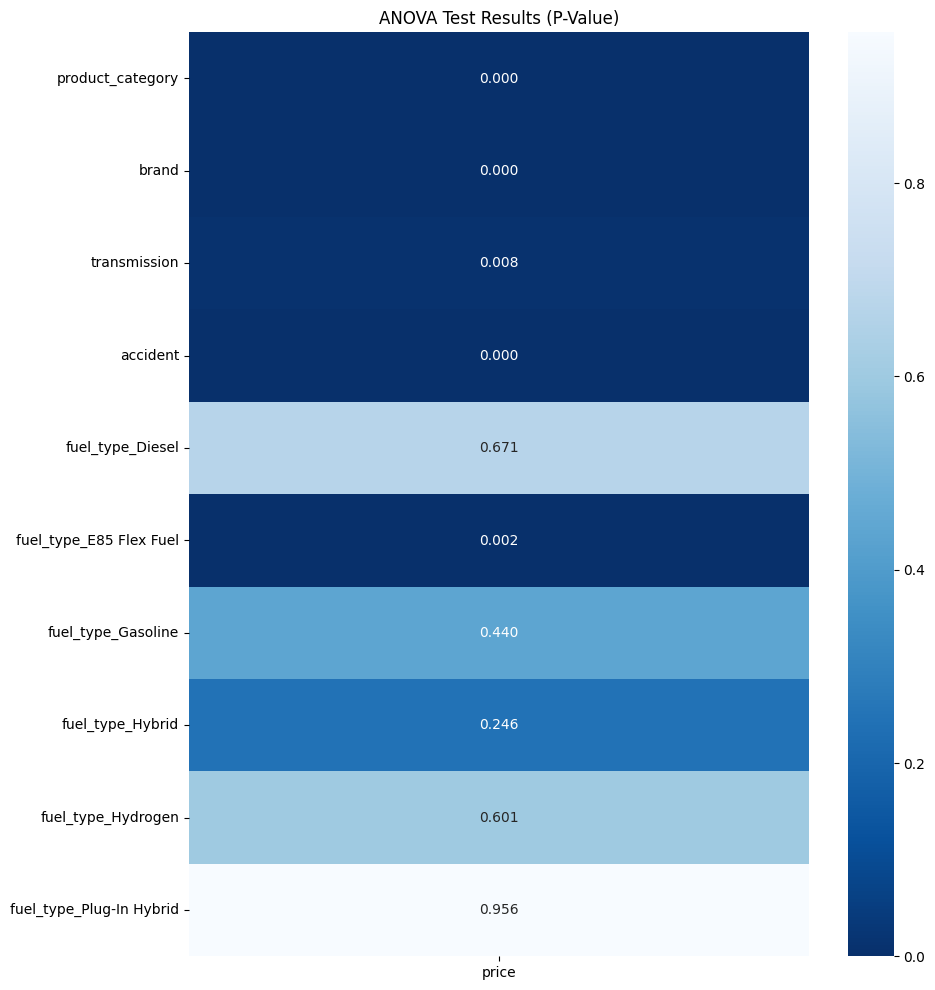

In [51]:
# correlation analysis between categorical and target variables using ANOVA
anova_results = {}
p_values_df = pd.DataFrame(index=categorical_features, columns=[target_feature], dtype=np.float64)

for cat_feat in categorical_features:
    group_data = [df[target_feature][df[cat_feat] == category] for category in df[cat_feat].unique()]
    F, p = f_oneway(*group_data)
    p_values_df.loc[cat_feat, target_feature] = round(p, 3)

p_values_df = p_values_df.applymap(lambda x: '{:.3f}'.format(x) if not pd.isna(x) else x)
plt.figure(figsize=(10, 12))
sns.heatmap(p_values_df.astype(float), cmap='Blues_r', annot=True, fmt='.3f')
plt.title('ANOVA Test Results (P-Value)')
plt.show()

In [52]:
# p-value analysis to see the correlation between categorical and target variables
p_value_threshold = 0.05

significant_relationships = []
non_significant_relationships = []

for tar_feat in [target_feature]:
    for cat_feat in categorical_features:
        p_value = float(p_values_df.loc[cat_feat, tar_feat])
        if p_value < p_value_threshold:
            significant_relationships.append((cat_feat, tar_feat))
        else:
            non_significant_relationships.append((cat_feat, tar_feat))

if significant_relationships:
    print('Significant differences were detected between the following categorical and target variables:')
    print()
    for cat_feat, tar_feat in significant_relationships:
        print(f"{cat_feat} dan {tar_feat}")
else:
    print('There is no significant difference between categorical and target variables')

if non_significant_relationships:
    print('\nNo significant relationship was detected between the following categorical and target variables:')
    print()
    for cat_feat, tar_feat in non_significant_relationships:
        print(f"{cat_feat} dan {tar_feat}")
else:
    print('\nAll pairs of categorical variables have significant relationships.')

Significant differences were detected between the following categorical and target variables:

product_category dan price
brand dan price
transmission dan price
accident dan price
fuel_type_E85 Flex Fuel dan price

No significant relationship was detected between the following categorical and target variables:

fuel_type_Diesel dan price
fuel_type_Gasoline dan price
fuel_type_Hybrid dan price
fuel_type_Hydrogen dan price
fuel_type_Plug-In Hybrid dan price


### BETWEEN NUMERICAL AND TARGET VARIABLE USING SPEARMAN CORRELATION

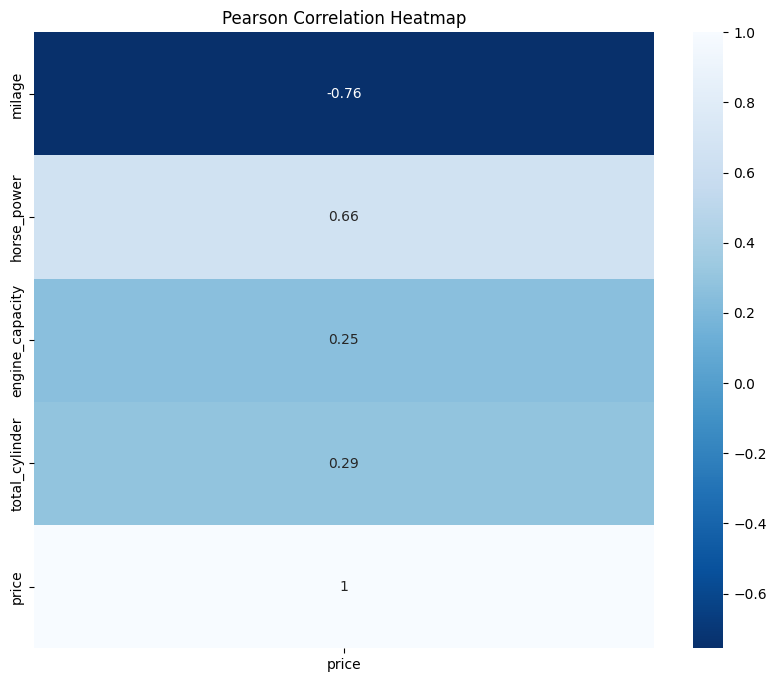

In [53]:
# correlation analysis between numerical and target variables using pearson
df_filtered = df[numerical_features + [target_feature]]
correlations = df_filtered.corr(method='spearman')[target_feature]

plt.figure(figsize=(10, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='Blues_r', cbar=True)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [54]:
# looks at the relationship between numerical and target variables using VIF score
numeric = df_filtered[numerical_features]
numeric = sm.add_constant(numeric)

vif_numeric_pairwise = pd.DataFrame()
vif_numeric_pairwise['Variable'] = numeric.columns[1:]
vif_numeric_pairwise['VIF'] = [variance_inflation_factor(numeric.values, i) for i in range(1, numeric.shape[1])]

vif_threshold = 5

multicollinear_vars = []
for idx, row in vif_numeric_pairwise.iterrows():
    if row['VIF'] > vif_threshold:
        multicollinear_vars.append(row['Variable'])

print('Correlation between Numerical and Target Variables:')
print(correlations)
print('-' * 90)

print('VIF between Numerical and Target Variables (Pairwise):')
print(vif_numeric_pairwise)
print('-' * 90)

if multicollinear_vars:
    print('Multicollinearity symptoms were detected in the following variables:')
    for var in multicollinear_vars:
        print(var)
else:
    print('No multicollinearity symptoms were detected')

Correlation between Numerical and Target Variables:
milage            -0.756
horse_power        0.655
engine_capacity    0.253
total_cylinder     0.289
price              1.000
Name: price, dtype: float64
------------------------------------------------------------------------------------------
VIF between Numerical and Target Variables (Pairwise):
          Variable   VIF
0           milage 1.307
1      horse_power 2.571
2  engine_capacity 4.411
3   total_cylinder 5.372
------------------------------------------------------------------------------------------
Multicollinearity symptoms were detected in the following variables:
total_cylinder


## TRAIN TEST SPLIT

In [55]:
# divide data into training and testing
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## HANDLING OUTLIER

In [56]:
# remove outlier using IQR Method
def remove_outliers_iqr(X_train, y_train, columns):
    train_data = pd.concat([X_train, y_train], axis=1)
    train_data_no_outliers = train_data.copy()

    for column in columns:
        Q1 = np.percentile(train_data[column], 25)
        Q3 = np.percentile(train_data[column], 75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_mask = (train_data[column] < lower_bound) | (train_data[column] > upper_bound)
        train_data_no_outliers = train_data_no_outliers[~outliers_mask]

    X_train_no_outliers = train_data_no_outliers.drop(columns=['price'])
    y_train_no_outliers = train_data_no_outliers['price']

    return X_train_no_outliers, y_train_no_outliers

columns_to_handle_outliers = ['milage', 'horse_power', 'engine_capacity', 'total_cylinder', 'price']
X_train, y_train = remove_outliers_iqr(X_train, y_train, columns_to_handle_outliers)

## FEATURE SELECTION

In [57]:
# convert boolean to integer, because for using OLS Regression Analysis
X_train = X_train.astype(int)

In [58]:
# feature selection using OLS Regression
X_cons = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     459.0
Date:                Mon, 20 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:58:33   Log-Likelihood:                -29239.
No. Observations:                2718   AIC:                         5.851e+04
Df Residuals:                    2704   BIC:                         5.859e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
product_category        

In [59]:
# check VIF Value for detect multicolinearity
vif = pd.DataFrame()
vif['Variable'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif)

                    Variable    VIF
0           product_category  1.296
1                      brand  1.136
2                     milage  1.352
3                horse_power  2.850
4            engine_capacity  5.763
5             total_cylinder  5.611
6               transmission  1.038
7                   accident  1.088
8           fuel_type_Diesel  2.085
9    fuel_type_E85 Flex Fuel  2.538
10        fuel_type_Gasoline 34.079
11          fuel_type_Hybrid  2.958
12        fuel_type_Hydrogen  1.015
13  fuel_type_Plug-In Hybrid  1.323


In [60]:
# drop fuel_type_gasoline because have VIF Score strong and redundant
X_train.drop(columns=['fuel_type_Gasoline'], inplace=True)
X_test.drop(columns=['fuel_type_Gasoline'], inplace=True)

In [61]:
# deleted some values in the brand and transmission columns, because when grouped, the values were only of type Gasoline in fuel type
train_to_drop = X_train[(X_train['fuel_type_Diesel'] == 0) & 
                        (X_train['fuel_type_E85 Flex Fuel'] == 0) & 
                        (X_train['fuel_type_Hybrid'] == 0) & 
                        (X_train['fuel_type_Hydrogen'] == 0) & 
                        (X_train['fuel_type_Plug-In Hybrid'] == 0)].index

X_train.drop(index=train_to_drop, inplace=True)
y_train.drop(index=train_to_drop, inplace=True)

test_to_drop = X_test[(X_test['fuel_type_Diesel'] == 0) & 
                        (X_test['fuel_type_E85 Flex Fuel'] == 0) & 
                        (X_test['fuel_type_Hybrid'] == 0) & 
                        (X_test['fuel_type_Hydrogen'] == 0) & 
                        (X_test['fuel_type_Plug-In Hybrid'] == 0)].index

X_test.drop(index=test_to_drop, inplace=True)
y_test.drop(index=test_to_drop, inplace=True)

In [62]:
# split data train to train and validation
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## MODEL TRAINING

In [63]:
# perform model training after finding the best parameters of each model
regression = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

results = []

for model_name, model in regression.items():

    model.fit(X_train_val, y_train_val)

    y_pred_train = model.predict(X_train_val)
    y_pred_val = model.predict(X_val)

    mae_train = mean_absolute_error(y_train_val, y_pred_train)
    mae_val = mean_absolute_error(y_val, y_pred_val)

    mse_train = mean_squared_error(y_train_val, y_pred_train)
    mse_val = mean_squared_error(y_val, y_pred_val)

    rmse_train = np.sqrt(mse_train)
    rmse_val = np.sqrt(mse_val)
    
    r2_train = r2_score(y_train_val, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)

    result = {
        'Model': model_name,
        'Train MAE': mae_train,
        'Validation MAE': mae_val,
        'Train RMSE': rmse_train,
        'Validation RMSE': rmse_val,
        'Train R2': r2_train,
        'Validation R2': r2_val
    }
    results.append(result)

results_df = pd.DataFrame(results)
print(results_df.to_string())

               Model  Train MAE  Validation MAE  Train RMSE  Validation RMSE  Train R2  Validation R2
0  Linear Regression   7987.735        8693.499   10423.755        10870.435     0.771          0.771
1      Decision Tree      8.929       11032.043     105.644        14613.923     1.000          0.586
2      Random Forest   2781.976        8876.833    3857.036        10980.943     0.969          0.766
3  Gradient Boosting   3685.746        7574.308    5160.203         9433.295     0.944          0.828
4            XGBoost    123.571        8140.782     199.933        10462.438     1.000          0.788


## HYPER-PARAMETER TUNING

### RANDOM FOREST REGRESSOR

In [64]:
# create pipeline for scaling, cross-validation, hyper-parameter tuning, and check score for random forest regressor
preprocessor = ColumnTransformer(
    transformers=[
        ('minmax_scaling', MinMaxScaler(), ['milage', 'horse_power']),
    ],
    remainder='passthrough'
)

pipeline_rfr = Pipeline(steps=[
    ('scaler', preprocessor),
    ('regressor', RandomForestRegressor())
])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

param_dist_rfr = {
    'regressor__n_estimators': np.arange(1, 31, 1),
    'regressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'regressor__max_depth': np.arange(1, 31, 1),
    'regressor__min_samples_split': np.arange(2, 31, 1),
    'regressor__min_samples_leaf': np.arange(1, 31, 1),
    'regressor__max_features': ['sqrt', 'log2'],
    'regressor__max_leaf_nodes': np.arange(2, 31, 1),
    'regressor__max_samples': np.arange(0.1, 1.1, 0.1)
}

random_search_rfr = RandomizedSearchCV(
    estimator=pipeline_rfr,
    param_distributions=param_dist_rfr,
    n_iter=500,
    scoring=None,
    cv=kfold,
    random_state=42,
    verbose=2,
    n_jobs=-1,
    error_score='raise'
)

random_search_rfr.fit(X_train_val, y_train_val)
best_params_rfr = random_search_rfr.best_params_
best_model_rfr = random_search_rfr.best_estimator_

cv_score_rfr = random_search_rfr.best_score_
val_score_rfr = random_search_rfr.score(X_val, y_val)

print(f'Best Parameters: {best_params_rfr}')
print(f'Cross-validation score: {cv_score_rfr}\nValidation score: {val_score_rfr}')

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best Parameters: {'regressor__n_estimators': 25, 'regressor__min_samples_split': 7, 'regressor__min_samples_leaf': 1, 'regressor__max_samples': 1.0, 'regressor__max_leaf_nodes': 22, 'regressor__max_features': 'log2', 'regressor__max_depth': 20, 'regressor__criterion': 'poisson'}
Cross-validation score: 0.7428414643637166
Validation score: 0.7701165975372364


### GRADIENT BOOSTING REGRESSOR

In [65]:
# create pipeline for scaling, cross-validation, hyper-parameter tuning, and check score for gradient boosting regressor
preprocessor = ColumnTransformer(
    transformers=[
        ('minmax_scaling', MinMaxScaler(), ['milage', 'horse_power']),
    ],
    remainder='passthrough'
)

pipeline_gbr = Pipeline(steps=[
    ('scaler', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

param_dist_gbr = {
    'regressor__loss':  ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'regressor__learning_rate': np.arange(0.1, 1.1, 0.1),
    'regressor__n_estimators': np.arange(1, 51, 1),
    'regressor__subsample': np.arange(0.1, 1.1, 0.1),
    'regressor__criterion': ['friedman_mse', 'squared_error'],
    'regressor__min_samples_split': np.arange(2, 31, 1),
    'regressor__min_samples_leaf': np.arange(1, 31, 1),
    'regressor__max_depth': np.arange(1, 31, 1),
    'regressor__max_features': ['sqrt', 'log2']
}

random_search_gbr = RandomizedSearchCV(
    estimator=pipeline_gbr,
    param_distributions=param_dist_gbr,
    n_iter=500,
    scoring=None,
    cv=kfold,
    random_state=42,
    verbose=2,
    n_jobs=-1,
    error_score='raise'
)

random_search_gbr.fit(X_train_val, y_train_val)
best_params_gbr = random_search_gbr.best_params_
best_model_gbr = random_search_gbr.best_estimator_

cv_score_gbr = random_search_gbr.best_score_
val_score_gbr = random_search_gbr.score(X_val, y_val)

print(f'Best Parameters: {best_params_gbr}')
print(f'Cross-validation score: {cv_score_gbr}\nValidation score: {val_score_gbr}')

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


Best Parameters: {'regressor__subsample': 0.7000000000000001, 'regressor__n_estimators': 46, 'regressor__min_samples_split': 21, 'regressor__min_samples_leaf': 7, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 22, 'regressor__loss': 'huber', 'regressor__learning_rate': 0.30000000000000004, 'regressor__criterion': 'squared_error'}
Cross-validation score: 0.7888798428419722
Validation score: 0.8326473643400095


### XGBOOST REGRESSOR

In [66]:
# create pipeline for scaling, cross-validation, hyper-parameter tuning, and check score for xgboost regressor
preprocessor = ColumnTransformer(
    transformers=[
        ('minmax_scaling', MinMaxScaler(), ['milage', 'horse_power']),
    ],
    remainder='passthrough'
)

pipeline_xgb = Pipeline(steps=[
    ('scaler', preprocessor),
    ('regressor', XGBRegressor())
])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

param_dist_xgb = {
    'regressor__n_estimators':  np.arange(1, 21, 1),
    'regressor__learning_rate': np.arange(0.1, 1.1, 0.1),
    'regressor__max_depth': np.arange(1, 21, 1),
    'regressor__min_child_weight': np.arange(1, 21, 1),
    'regressor__subsample': np.arange(0.5, 1.0, 0.1),
    'regressor__colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'regressor__gamma': np.arange(0.1, 1.1, 0.1),
    'regressor__reg_alpha': np.arange(0.1, 1.1, 0.1),
    'regressor__reg_lambda': np.arange(0.1, 1.1, 0.1),
}

random_search_xgb = RandomizedSearchCV(
    estimator=pipeline_xgb,
    param_distributions=param_dist_xgb,
    n_iter=500,
    scoring=None,
    cv=kfold,
    random_state=42,
    verbose=2,
    n_jobs=-1,
    error_score='raise'
)

random_search_xgb.fit(X_train_val, y_train_val)
best_params_xgb = random_search_xgb.best_params_
best_model_xgb = random_search_xgb.best_estimator_

cv_score_xgb = random_search_xgb.best_score_
val_score_xgb = random_search_xgb.score(X_val, y_val)

print(f'Best Parameters: {best_params_xgb}')
print(f'Cross-validation score: {cv_score_xgb}\nValidation score: {val_score_xgb}')

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


Best Parameters: {'regressor__subsample': 0.8999999999999999, 'regressor__reg_lambda': 0.9, 'regressor__reg_alpha': 0.5, 'regressor__n_estimators': 18, 'regressor__min_child_weight': 16, 'regressor__max_depth': 12, 'regressor__learning_rate': 0.30000000000000004, 'regressor__gamma': 0.8, 'regressor__colsample_bytree': 0.8999999999999999}
Cross-validation score: 0.7898718569465685
Validation score: 0.8128086235007526


## MODEL TRAINING AFTER TUNING

In [67]:
# perform model training after finding the best parameters of each model
regression_tuning = {
    'Random Forest': best_model_rfr,
    'Gradient Boosting': best_model_gbr,
    'XGBoost': best_model_xgb
}

results = []

for model_name, model in regression_tuning.items():

    model.fit(X_train_val, y_train_val)

    y_pred_train = model.predict(X_train_val)
    y_pred_val = model.predict(X_val)

    mae_train = mean_absolute_error(y_train_val, y_pred_train)
    mae_val = mean_absolute_error(y_val, y_pred_val)

    mse_train = mean_squared_error(y_train_val, y_pred_train)
    mse_val = mean_squared_error(y_val, y_pred_val)

    rmse_train = np.sqrt(mse_train)
    rmse_val = np.sqrt(mse_val)
    
    r2_train = r2_score(y_train_val, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)

    result = {
        'Model': model_name,
        'Train MAE': mae_train,
        'Validation MAE': mae_val,
        'Train RMSE': rmse_train,
        'Validation RMSE': rmse_val,
        'Train R2': r2_train,
        'Validation R2': r2_val
    }
    results.append(result)

results_df = pd.DataFrame(results)
print(results_df.to_string())

               Model  Train MAE  Validation MAE  Train RMSE  Validation RMSE  Train R2  Validation R2
0      Random Forest   6450.470        9333.252    8368.957        11417.583     0.852          0.747
1  Gradient Boosting   3246.966        7226.008    4983.441         9242.735     0.948          0.835
2            XGBoost   4676.366        7793.070    6383.877         9830.519     0.914          0.813


In [68]:
# model training using data testing
regression_tuning = {
    'Random Forest': best_model_rfr,
    'Gradient Boosting': best_model_gbr,
    'XGBoost': best_model_xgb
}

results = []

for model_name, model in regression_tuning.items():

    model.fit(X_train_val, y_train_val)

    y_pred = model.predict(X_test)

    mae_test = mean_absolute_error(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred)

    result = {
        'Model': model_name,
        'Test MAE': mae_test,
        'Test RMSE': rmse_test,
        'Test R2': r2_test
    }
    results.append(result)

results_df = pd.DataFrame(results)
print(results_df.to_string())

               Model  Test MAE  Test RMSE  Test R2
0      Random Forest  9736.797  16213.710    0.639
1  Gradient Boosting  9369.220  15089.504    0.687
2            XGBoost  8670.671  14072.083    0.728


## RESIDUAL TEST

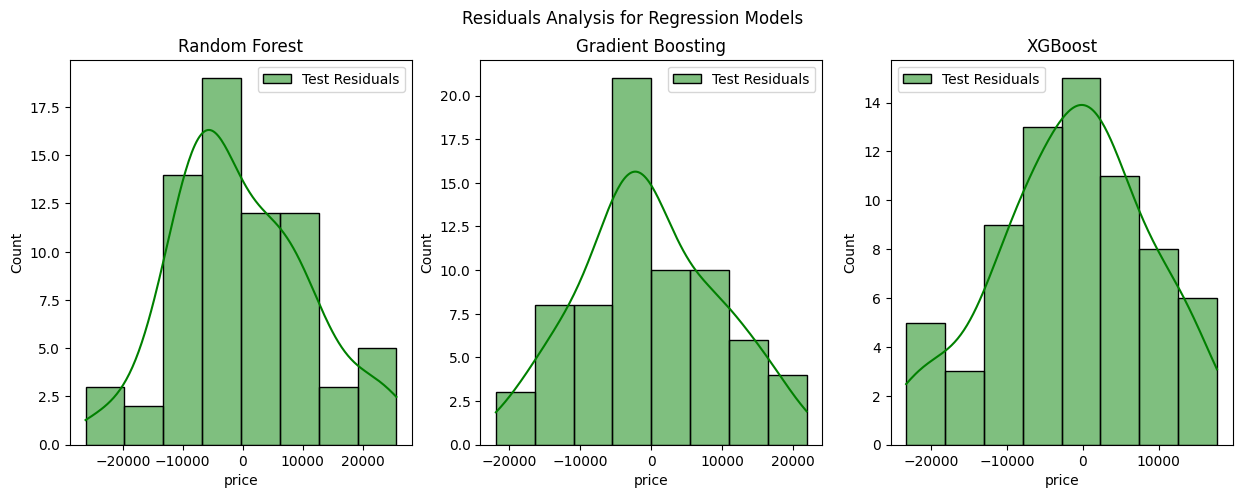

In [69]:
# residual test to see the distribution of the difference between actual and predicted values
fig, axes = plt.subplots(nrows=1, ncols=len(regression_tuning), figsize=(15, 5))
fig.suptitle('Residuals Analysis for Regression Models')

for i, (model_name, model) in enumerate(regression_tuning.items()):
    model.fit(X_train_val, y_train_val)
    y_pred_val = model.predict(X_val)
    residuals_test = y_val - y_pred_val

    sns.histplot(residuals_test, kde=True, ax=axes[i], color='green', label='Test Residuals')
    axes[i].set_title(model_name)
    axes[i].legend()

plt.show()

## FEATURE IMPORTANCES

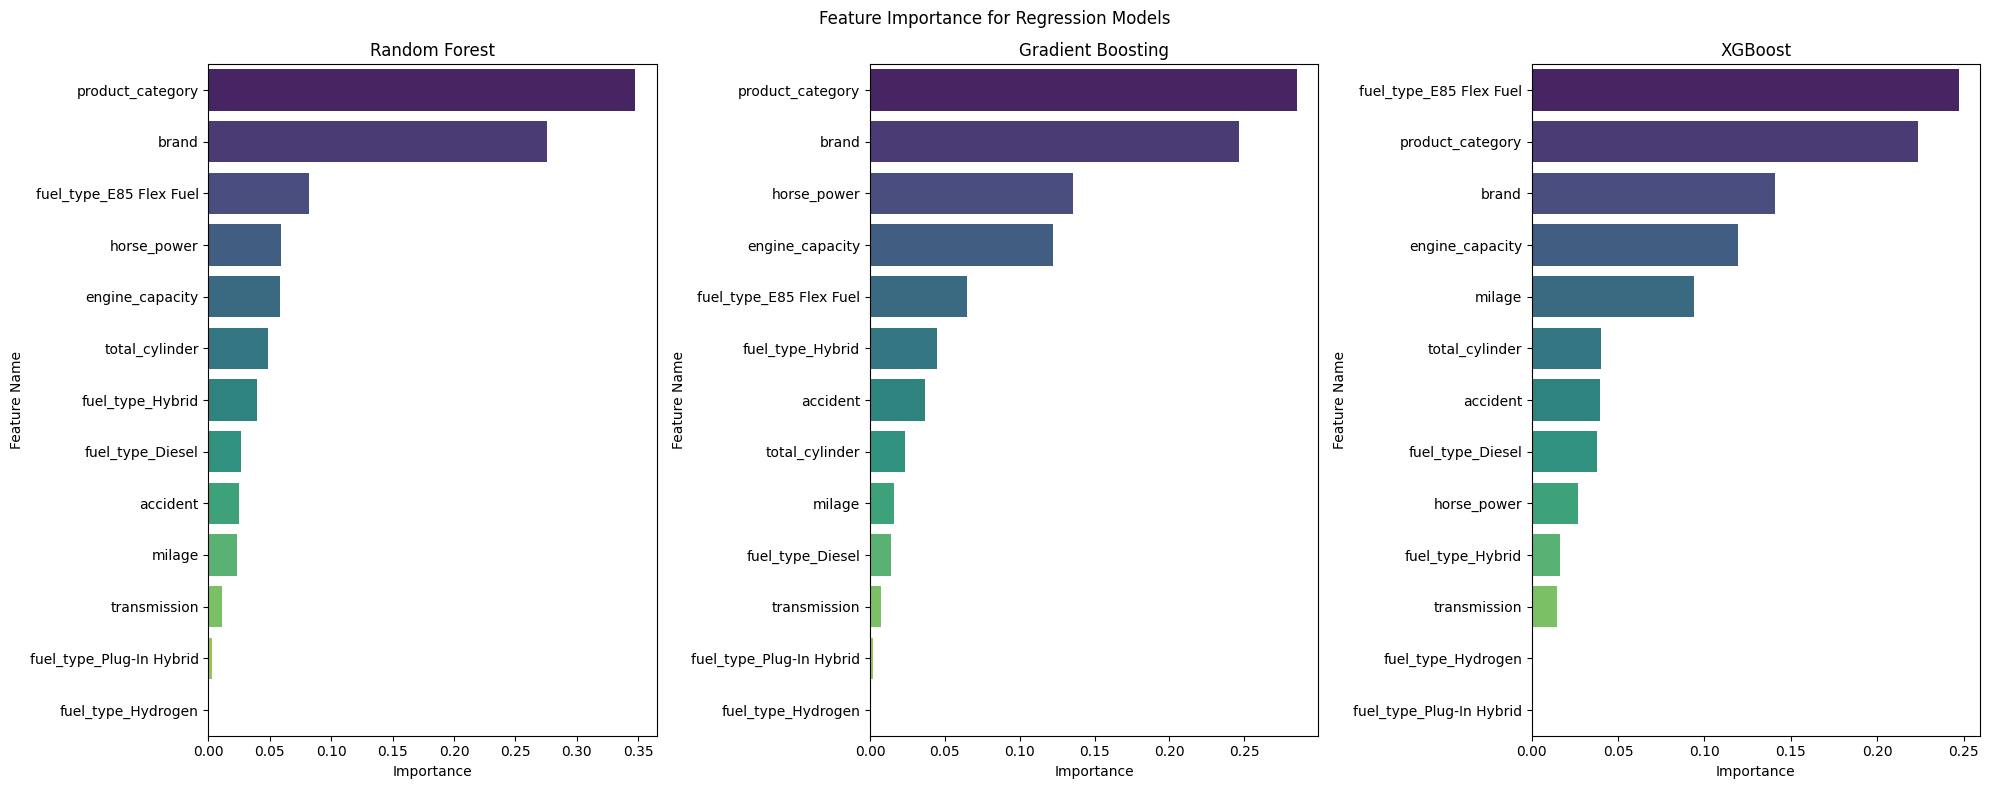

In [70]:
# perform feature importance techniques to see how each feature affects the performance of the model (XGBoost) in making a prediction
fig, axes = plt.subplots(nrows=1, ncols=len(regression_tuning), figsize=(20, 8))
fig.suptitle('Feature Importance for Regression Models')

for i, (model_name, model) in enumerate(regression_tuning.items()):
    model.fit(X_train_val, y_train_val)

    regressor = model.named_steps['regressor']

    if hasattr(regressor, 'feature_importances_'):
        feature_importance = regressor.feature_importances_
        feature_names = X_train_val.columns

        imp_df = pd.DataFrame({
            'Feature Name': feature_names,
            'Importance': feature_importance
        })

        fi = imp_df.sort_values(by='Importance', ascending=False)

        sns.barplot(x='Importance', y='Feature Name', data=fi, ax=axes[i], palette='viridis')
        axes[i].set_title(model_name)

plt.tight_layout()
plt.show()

## DEPLOY TO STREAMLIT WEB APP

In [71]:
# deploy to streamlit web app with best model for prediction
xgb_model_filtered = XGBRegressor(
    subsample=0.9,
    reg_lambda=0.9, 
    reg_alpha=0.5, 
    n_estimators=18, 
    min_child_weight=16, 
    max_depth=12,  
    learning_rate=0.3,
    gamma=0.8,
    colsample_bytree=0.9
)

xgb_model_filtered.fit(X_train_val, y_train_val)

with open('Car_Price_Prediction_Sample.sav', 'wb') as file:
    pickle.dump(xgb_model_filtered, file)

## PREDICTION TESTING

In [72]:
# conduct prediction trials
y_pred = xgb_model_filtered.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE Score: {mae}')

sample_predictions = xgb_model_filtered.predict(X_test)

MAE Score: 8824.0255247682


In [73]:
# conduct prediction trials
df_new = pd.DataFrame(X_test, columns=['product_category', 'brand', 'milage', 'horse_power', 'engine_capacity', 'total_cylinder', 'transmission', 'accident', 'fuel_type_Diesel', 
                                       'fuel_type_E85 Flex Fuel', 'fuel_type_Hybrid', 'fuel_type_Hydrogen', 'fuel_type_Plug-In Hybrid'])

sample_predictions = list(sample_predictions)

if len(df_new) == len(sample_predictions):
    df_new['Prediction'] = sample_predictions
    print(df_new.head().to_string())
else:
    print("Lengths do not match!")

      product_category  brand  milage  horse_power  engine_capacity  total_cylinder  transmission  accident  fuel_type_Diesel  fuel_type_E85 Flex Fuel  fuel_type_Hybrid  fuel_type_Hydrogen  fuel_type_Plug-In Hybrid  Prediction
1612                 5     26   39750          134            1.800           4.000             1         1             False                    False              True               False                     False   28337.619
2570                 3     14   31000          316            6.200           8.000             1         0             False                     True             False               False                     False   30257.031
2879                 3      9  133510          120            2.200           4.000             1         1             False                     True             False               False                     False    6997.959
554                  0     41   46000          305            3.600           6.000         